
Since the problem statement involves predicting patient survival using a binary classification model with hospital_death as the target variable, I'll begin by loading and preparing the dataset for the classification task. We will aim to predict hospital_death based on the other 84 features using a machine learning model, such as logistic regression or a random forest classifier.

Load the dataset.

Preprocess the data (handle missing values, encode categorical variables, etc.).

Split the data into training and test sets.

Train a classifier (Logistic Regression or Random Forest).

Evaluate the model using Accuracy and Area Under ROC Curve (AUC).

The dataset contains 186 columns, including patient demographics, medical conditions, and various clinical features. The target variable for this classification task is hospital_death, which is a binary variable (0 for survival, 1 for death).

Next, I'll proceed with:

Handling any missing values.

Encoding categorical variables.

Splitting the data into training and testing sets.

Building a classification model (Logistic Regression or Random Forest).

The dataset has a significant amount of missing data in several columns, particularly for clinical measurements like bilirubin, lactate, and albumin. We'll handle these missing values in one of the following ways:

Imputation: Fill missing values with the median or mean.
Drop columns/rows: If columns have too many missing values, we can drop them.

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder


In [ ]:
# Load the dataset
df_patient = pd.read_csv('/content/Dataset.csv')  # You can modify this based on the actual file name
df_dictionary = pd.read_csv('/content/Data Dictionary.csv')  #

In [ ]:
# Display the first few rows of the dataset and data dictionary
print("Dataset Preview:")
print(df_patient.head())

Dataset Preview:
   encounter_id  patient_id  hospital_id  hospital_death   age    bmi  \
0         66154       25312          118               0  68.0  22.73   
1        114252       59342           81               0  77.0  27.42   
2        119783       50777          118               0  25.0  31.95   
3         79267       46918          118               0  81.0  22.64   
4         92056       34377           33               0  19.0    NaN   

   elective_surgery  ethnicity gender  height  ... aids cirrhosis  \
0                 0  Caucasian      M   180.3  ...  0.0       0.0   
1                 0  Caucasian      F   160.0  ...  0.0       0.0   
2                 0  Caucasian      F   172.7  ...  0.0       0.0   
3                 1  Caucasian      F   165.1  ...  0.0       0.0   
4                 0  Caucasian      M   188.0  ...  0.0       0.0   

   diabetes_mellitus hepatic_failure immunosuppression  leukemia  lymphoma  \
0                1.0             0.0               

In [ ]:
print("\nData Dictionary Preview:")
print(df_dictionary.head())



Data Dictionary Preview:
      Category   Variable Name Unit of Measure Data Type  \
0   identifier    encounter_id             NaN   integer   
1   identifier     hospital_id             NaN   integer   
2   identifier      patient_id             NaN   integer   
3  demographic  hospital_death             NaN    binary   
4  demographic             age           Years   numeric   

                                         Description Example  
0  Unique identifier associated with a patient un...     NaN  
1       Unique identifier associated with a hospital     NaN  
2        Unique identifier associated with a patient     NaN  
3  Whether the patient died during this hospitali...       0  
4           The age of the patient on unit admission     NaN  


In [ ]:
# Handle missing values
# For numeric columns, we will use median imputation
numeric_cols = df_patient.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='median')
df_patient[numeric_cols] = imputer.fit_transform(df_patient[numeric_cols])

In [ ]:
# For categorical columns, use the most frequent value to impute missing data
categorical_cols = df_patient.select_dtypes(include=['object']).columns
imputer_cat = SimpleImputer(strategy='most_frequent')
df_patient[categorical_cols] = imputer_cat.fit_transform(df_patient[categorical_cols])


In [ ]:
# Encode categorical variables (like gender, ethnicity, etc.)
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_patient[col] = le.fit_transform(df_patient[col])
    label_encoders[col] = le  # Store label encoders if needed for inverse transform


In [ ]:

# Separate features and target variable
X = df_patient.drop(columns=['hospital_death'])
y = df_patient['hospital_death']


In [ ]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Build and train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Predict on the test set
y_pred = rf_model.predict(X_test)

In [ ]:
# Evaluate the model using Accuracy and AUC
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])


In [ ]:
# Print the results
print(f"Accuracy: {accuracy}")
print(f"Area Under ROC Curve (AUC): {roc_auc}")

Accuracy: 0.9316753753555129
Area Under ROC Curve (AUC): 0.8815865981407578


To build a deep learning model for predicting patient survival based on the hospital_death target variable, we will implement a Deep Neural Network (DNN) using Keras. The goal is to predict whether a patient will survive (0) or die (1) during their hospital stay based on 84 other features.

Steps:
Data Preprocessing: Handle missing values, encode categorical variables, and split the dataset.
Build a Deep Learning Model: Build and compile a DNN using Keras.

Train the Model: Train the DNN on the training data.
Evaluate the Model: Use Accuracy and AUC as the evaluation metrics.

Visualize Training Performance: Optionally visualize the training/validation loss and accuracy.
Implementation:

1. Data Preprocessing
We start by preprocessing the dataset: handle missing values, encode categorical variables, and split the dataset into training and testing sets.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from google.colab import files

# Load the dataset
df_patient = pd.read_csv('/content/Dataset.csv')

# Handle missing values
# For numeric columns, we will use median imputation
numeric_cols = df_patient.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='median')
df_patient[numeric_cols] = imputer.fit_transform(df_patient[numeric_cols])

# For categorical columns, use the most frequent value to impute missing data
categorical_cols = df_patient.select_dtypes(include=['object']).columns
imputer_cat = SimpleImputer(strategy='most_frequent')
df_patient[categorical_cols] = imputer_cat.fit_transform(df_patient[categorical_cols])

# Encode categorical variables (like gender, ethnicity, etc.)
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_patient[col] = le.fit_transform(df_patient[col])
    label_encoders[col] = le  # Store label encoders if needed for inverse transform

# Separate features and target variable
X = df_patient.drop(columns=['hospital_death'])
y = df_patient['hospital_death']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature values for deep learning model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


2. Build the Deep Learning Model
We now build a Deep Neural Network (DNN) using Keras with several hidden layers. This model will classify whether the patient survives or dies based on the provided features.



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the deep learning model
model = Sequential()

# Input layer
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))

# Hidden layers
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

# Output layer (binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC()])

# Summary of the model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │          11,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,545 (111.50 KB)

 Trainable params: 28,545 (111.50 KB)

 Non-trainable params: 0 (0.00 B)

3. Train the Model
Now we train the DNN model using the training data:

In [ ]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))


Epoch 1/50
2293/2293 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.9192 - auc: 0.8205 - loss: 0.2301 - val_accuracy: 0.9277 - val_auc: 0.8822 - val_loss: 0.1997
Epoch 2/50
2293/2293 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.9297 - auc: 0.8934 - loss: 0.1896 - val_accuracy: 0.9269 - val_auc: 0.8868 - val_loss: 0.1959
Epoch 3/50
2293/2293 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9313 - auc: 0.9024 - loss: 0.1827 - val_accuracy: 0.9295 - val_auc: 0.8873 - val_loss: 0.1944
Epoch 4/50
2293/2293 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9332 - auc: 0.9061 - loss: 0.1790 - val_accuracy: 0.9297 - val_auc: 0.8827 - val_loss: 0.1987
Epoch 5/50
2293/2293 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9358 - auc: 0.9201 - loss: 0.1684 - val_accuracy: 0.9261 - val_auc: 0.8798 - val_loss: 0.2048
Epoch 6/50
2293/2293 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.9407 - auc: 0.9297 - loss: 0.1565 - val_accuracy: 0.9256 - val_auc: 0.8755 - val_loss: 0.2072
Epoch 7/50
2293/2293 ━

4. Evaluate the Model
After training, we evaluate the model on the test data using Accuracy and AUC.

In [ ]:
# Evaluate the model
loss, accuracy, auc = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy}")
print(f"Test AUC: {auc}")


574/574 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9098 - auc: 0.7267 - loss: 0.8725
Test Accuracy: 0.9075396656990051
Test AUC: 0.7225976586341858


5. Visualize the Training Process
Finally, we can visualize the training and validation accuracy and loss to understand the model's learning behavior.

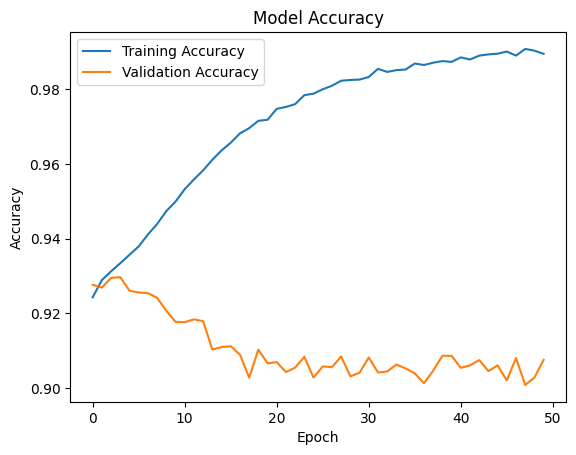

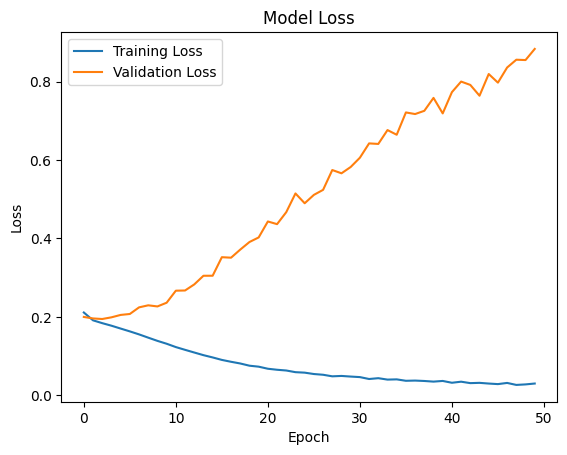

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()
